# Linear Regression

https://www.youtube.com/watch?v=0Lt9w-BxKFQ
https://scikit-learn.org/stable/index.html
https://www.youtube.com/watch?v=QUT1VHiLmmI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
plt.style.use("seaborn")
Year = 252 # trading days on a year

In [2]:
data = pd.read_csv("GBPEUR=X.cvs",parse_dates= ["Date"],index_col=["Date"])

<AxesSubplot:title={'center':'GBP/EUR'}, xlabel='Date'>

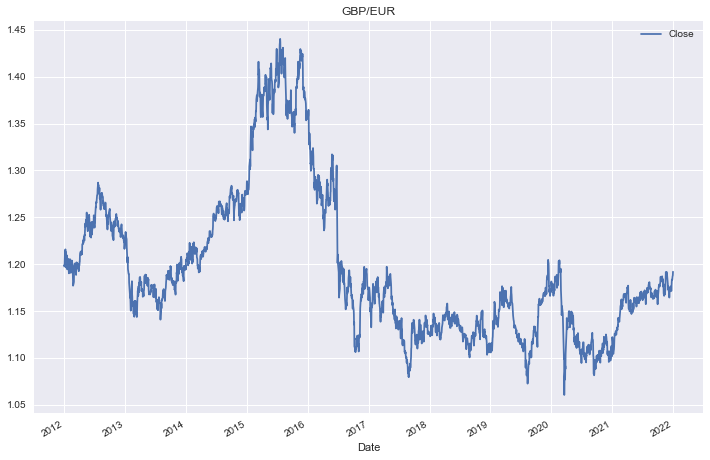

In [3]:
data.plot(figsize = (12,8), title = "GBP/EUR")

In [4]:
data["Returns"] = np.log(data.div(data.shift(1)))

In [5]:
data["Lag"] = data.Returns.shift(1) #independent variable 

In [6]:
data.dropna(inplace=True)

In [7]:
data

,Close,Returns,Lag
Date,,,
2012-01-04,1.19820,-0.000751,0.001419
2012-01-05,1.20670,0.007069,-0.000751
2012-01-06,1.21130,0.003805,0.007069
2012-01-09,1.21570,0.003626,0.003805
2012-01-10,1.20970,-0.004948,0.003626
...,...,...,...
2021-12-27,1.18344,0.000034,0.004183
2021-12-28,1.18629,0.002405,0.000034
2021-12-29,1.18710,0.000683,0.002405


<AxesSubplot:xlabel='Lag', ylabel='Returns'>

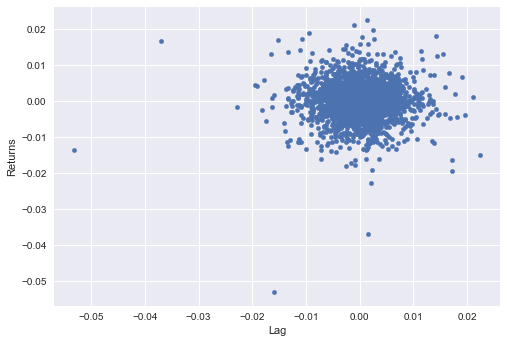

In [8]:
data.plot(kind = "scatter", x = "Lag", y = "Returns") # No a clear linear Relationship

In [9]:
Simple_Linear= LR(fit_intercept=True)

In [10]:
Simple_Linear.fit(data.Lag.to_frame(), data.Returns)

LinearRegression()

In [11]:
slp = Simple_Linear.coef_
slp

array([-0.01315879])

In [12]:
data["Prediction"] = Simple_Linear.predict(data.Lag.to_frame())

In [13]:
data

,Close,Returns,Lag,Prediction
Date,,,,
2012-01-04,1.19820,-0.000751,0.001419,-0.000021
2012-01-05,1.20670,0.007069,-0.000751,0.000007
2012-01-06,1.21130,0.003805,0.007069,-0.000095
2012-01-09,1.21570,0.003626,0.003805,-0.000052
2012-01-10,1.20970,-0.004948,0.003626,-0.000050
...,...,...,...,...
2021-12-27,1.18344,0.000034,0.004183,-0.000057
2021-12-28,1.18629,0.002405,0.000034,-0.000003
2021-12-29,1.18710,0.000683,0.002405,-0.000034


Text(0, 0.5, 'Returns')

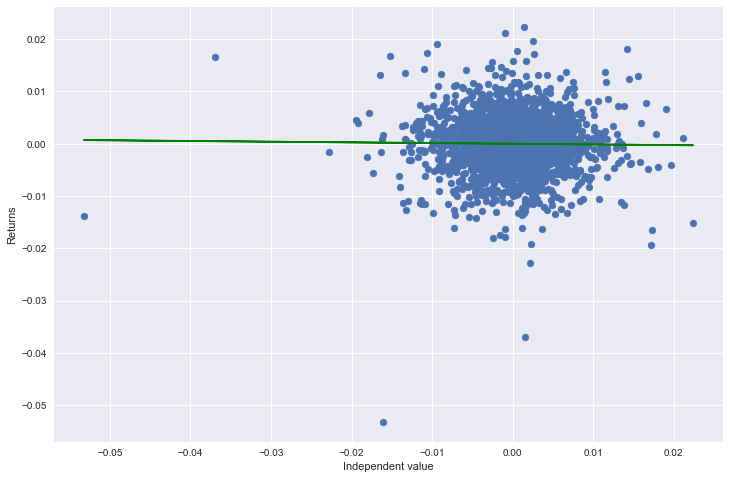

In [14]:
# Plot Simple Linear Regression
plt.figure(figsize=(12,8))
plt.scatter(x = data.Lag, y = data.Returns, label= "Data")
plt.plot(data.Lag, data.Prediction, c ="green", label = "Linear Regression Model")
plt.xlabel("Independent value")
plt.ylabel("Returns")

<AxesSubplot:xlabel='Date'>

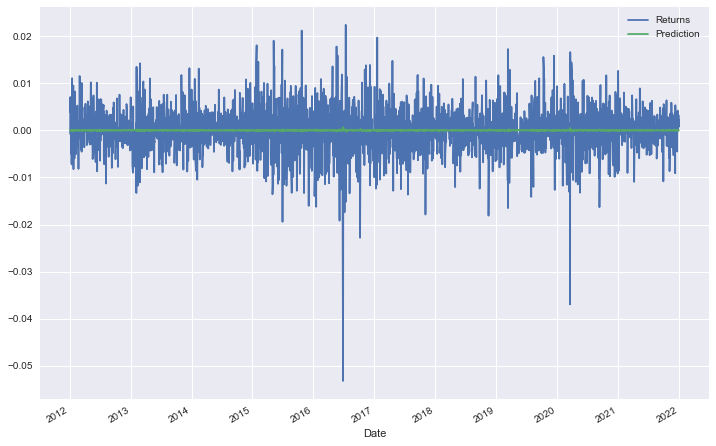

In [15]:
# Returns and Predictions, is very low predicted returns
data[["Returns","Prediction"]].plot(figsize=(12,8))

In [16]:
data.Prediction = np.sign(data.Prediction)

In [17]:
data

,Close,Returns,Lag,Prediction
Date,,,,
2012-01-04,1.19820,-0.000751,0.001419,-1.0
2012-01-05,1.20670,0.007069,-0.000751,1.0
2012-01-06,1.21130,0.003805,0.007069,-1.0
2012-01-09,1.21570,0.003626,0.003805,-1.0
2012-01-10,1.20970,-0.004948,0.003626,-1.0
...,...,...,...,...
2021-12-27,1.18344,0.000034,0.004183,-1.0
2021-12-28,1.18629,0.002405,0.000034,-1.0
2021-12-29,1.18710,0.000683,0.002405,-1.0


In [18]:
#if positve value a guessed was correct, if negative a guessed was incorrect
guessed = np.sign(data.Returns * data.Prediction).value_counts()
guessed

 1.0    1327
-1.0    1273
 0.0       6
dtype: int64

In [19]:
Ratio = guessed[1.0]/sum(guessed)
Ratio

0.5092095165003837

# Testing

In [20]:
data["Simple_LR"]= data.Prediction * data.Returns

In [21]:
data["CummulativeReturns"]= data["Returns"].cumsum().apply(np.exp)
data["Cummulative_LR"]= data["Simple_LR"].cumsum().apply(np.exp)

In [22]:
data

,Close,Returns,Lag,Prediction,Simple_LR,CummulativeReturns,Cummulative_LR
Date,,,,,,,
2012-01-04,1.19820,-0.000751,0.001419,-1.0,0.000751,0.999249,1.000751
2012-01-05,1.20670,0.007069,-0.000751,1.0,0.007069,1.006338,1.007850
2012-01-06,1.21130,0.003805,0.007069,-1.0,-0.003805,1.010174,1.004023
2012-01-09,1.21570,0.003626,0.003805,-1.0,-0.003626,1.013844,1.000389
2012-01-10,1.20970,-0.004948,0.003626,-1.0,0.004948,1.008840,1.005351
...,...,...,...,...,...,...,...
2021-12-27,1.18344,0.000034,0.004183,-1.0,-0.000034,0.986940,1.164547
2021-12-28,1.18629,0.002405,0.000034,-1.0,-0.002405,0.989317,1.161749
2021-12-29,1.18710,0.000683,0.002405,-1.0,-0.000683,0.989993,1.160956


<AxesSubplot:xlabel='Date'>

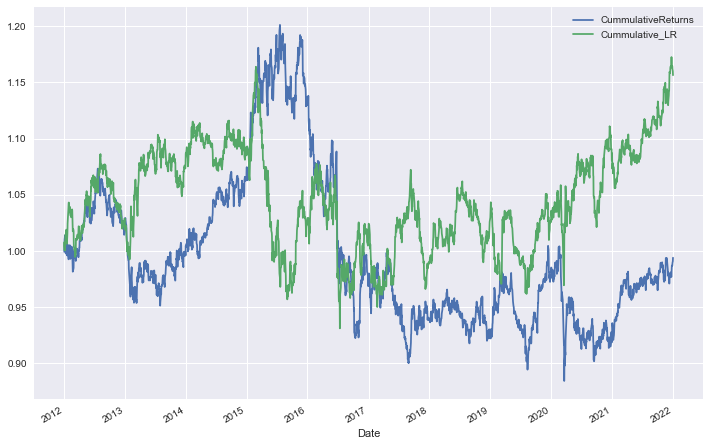

In [23]:
data[["CummulativeReturns","Cummulative_LR"]].plot(figsize=(12,8))

In [24]:
#Annual Return
annual_return = data[["Returns","Simple_LR"]].mean()*Year
annual_return

Returns     -0.000591
Simple_LR    0.014050
dtype: float64

In [25]:
#Annual Risk
annual_risk = data[["Returns","Simple_LR"]].std()*np.sqrt(Year)
annual_risk

Returns      0.079058
Simple_LR    0.079053
dtype: float64

In [26]:
#log absolute performance
data[["Returns","Simple_LR"]].sum().apply(np.exp)

Returns      0.993912
Simple_LR    1.156378
dtype: float64